# 1. Understanding the Data 

In [53]:
#please install the 'graphviz' not only in pip, but also in your computer
#For example : in MacBook, use brew install graphviz
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
from subprocess import call
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import display
import seaborn as sns
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import accuracy_score,f1_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.metrics import roc_curve, auc

#from keras.models import Sequential
#from keras.layers import Dense, Activation, Dropout
#from keras.datasets import mnist
#from keras.utils import np_utils

%matplotlib inline

In [2]:
#Load the data
train_raw_data_path = './train.csv'
test_raw_data_path = './test_gt.csv'

train_raw_data_all = pd.read_csv(train_raw_data_path)
test_raw_data_all = pd.read_csv(test_raw_data_path)


#################################Raw data####################################
raw_train_x_all = train_raw_data_all.drop('Survived', axis = 1)
raw_train_y_all = train_raw_data_all['Survived']

raw_test_x = train_raw_data_all.drop('Survived', axis = 1)
raw_test_y = train_raw_data_all['Survived']

raw_X_train, raw_X_valid, raw_y_train, raw_y_valid = train_test_split(raw_train_x_all, raw_train_y_all, test_size=0.2, shuffle=True, random_state=78)
print(train_raw_data_all.shape)
print(test_raw_data_all.shape)

#display(train_raw_data_all)
#display(train_raw_data_all)

(891, 12)
(418, 12)


# 2. Data Preprocess

In [3]:
train_raw_data_all.fillna({'Age':train_raw_data_all['Age'].median(),'Fare':train_raw_data_all['Fare'].median(),'Embarked':train_raw_data_all['Embarked'].mode()[0]},inplace=True)
train_raw_data_all.drop(['PassengerId'], axis=1, inplace = True)
train_raw_data_all['CallWhat'] = train_raw_data_all['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
train_raw_data_all['FamilyN'] = train_raw_data_all ['SibSp'] + train_raw_data_all['Parch'] + 1
train_raw_data_all['Alone'] = 1
train_raw_data_all['Alone'].loc[train_raw_data_all['FamilyN'] > 1] = 0

test_raw_data_all.fillna({'Age':test_raw_data_all['Age'].median(),'Fare':test_raw_data_all['Fare'].median(),'Embarked':test_raw_data_all['Embarked'].mode()[0]},inplace=True)
test_raw_data_all.drop(['PassengerId'], axis=1, inplace = True)
test_raw_data_all['CallWhat'] = test_raw_data_all['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
test_raw_data_all['FamilyN'] = test_raw_data_all ['SibSp'] + test_raw_data_all['Parch'] + 1
test_raw_data_all['Alone'] = 1
test_raw_data_all['Alone'].loc[test_raw_data_all['FamilyN'] > 1] = 0

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
train_raw_data_all['FareR'] = pd.qcut(train_raw_data_all['Fare'], 4)
train_raw_data_all['AgeR'] = pd.qcut(train_raw_data_all['Age'].astype(int), 5,duplicates='drop')
test_raw_data_all['FareR'] = pd.qcut(test_raw_data_all['Fare'], 4)
test_raw_data_all['AgeR'] = pd.qcut(test_raw_data_all['Age'].astype(int), 5, duplicates='drop')

In [5]:
ticket = []
for i in list(train_raw_data_all['Ticket']):
    if not i.isdigit() :
        ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        ticket.append("X")

ticket_test = []
for i in list(test_raw_data_all['Ticket']):
    if not i.isdigit() :
        ticket_test.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        ticket_test.append("X")

train_raw_data_all["Ticket"] = ticket
test_raw_data_all["Ticket"] = ticket_test

In [6]:
train_raw_data_all["CallWhat"] = train_raw_data_all["CallWhat"].replace(['Ms','Lady', 'the Countess','Countess','Mme','Capt', 'Col','Don', 'Dr', 'Major', 
                                            'Rev', 'Sir','Mlle', 'Jonkheer', 'Dona'], 'Little')
test_raw_data_all["CallWhat"] = test_raw_data_all["CallWhat"].replace(['Ms','Lady', 'the Countess','Countess','Mme','Capt', 'Col','Don', 'Dr', 'Major', 
                                            'Rev', 'Sir','Mlle', 'Jonkheer', 'Dona'], 'Little')

In [7]:
from sklearn.preprocessing import LabelEncoder



label_maker = LabelEncoder()
train_raw_data_all['Sex_label'] = label_maker.fit_transform(train_raw_data_all['Sex'])
train_raw_data_all['Eb_label'] = label_maker.fit_transform(train_raw_data_all['Embarked'])
train_raw_data_all['CW_label'] = label_maker.fit_transform(train_raw_data_all['CallWhat'])
train_raw_data_all['AgeR_label'] = label_maker.fit_transform(train_raw_data_all['AgeR'])
train_raw_data_all['FareR_label'] = label_maker.fit_transform(train_raw_data_all['FareR'])
train_raw_data_all['Ticket_label'] = label_maker.fit_transform(train_raw_data_all['Ticket'])


test_raw_data_all['Sex_label'] = label_maker.fit_transform(test_raw_data_all['Sex'])
test_raw_data_all['Eb_label'] = label_maker.fit_transform(test_raw_data_all['Embarked'])
test_raw_data_all['CW_label'] = label_maker.fit_transform(test_raw_data_all['CallWhat'])
test_raw_data_all['AgeR_label'] = label_maker.fit_transform(test_raw_data_all['AgeR'])
test_raw_data_all['FareR_label'] = label_maker.fit_transform(test_raw_data_all['FareR'])
test_raw_data_all['Ticket_label'] = label_maker.fit_transform(test_raw_data_all['Ticket'])


train_raw_data_all['Age'] = train_raw_data_all['Age'].astype(int)
test_raw_data_all['Age'] = test_raw_data_all['Age'].astype(int)

train_raw_data_all.drop(['Name','Sex','Cabin','CallWhat','FareR','AgeR','Embarked','Ticket','Parch','SibSp'], axis=1, inplace = True)
test_raw_data_all.drop(['Name','Sex','Cabin','CallWhat','FareR','AgeR','Embarked','Ticket','Parch','SibSp'], axis=1, inplace = True)

- Splite the data into modelling 

In [8]:
#train_raw_data_all.drop(['Name','Sex','Cabin','CallWhat','FareR','AgeR','Embarked'], axis=1, inplace = True)
#test_raw_data_all.drop(['Name','Sex','Cabin','CallWhat','FareR','AgeR','Embarked'], axis=1, inplace = True)

train_x_all = train_raw_data_all.drop('Survived', axis = 1)
train_y_all = train_raw_data_all['Survived']

test_x_all = test_raw_data_all.drop('Survived', axis = 1)
test_y_all = test_raw_data_all['Survived']

Real_predict = test_raw_data_all

X_train, X_valid, y_train, y_valid = train_test_split(train_x_all, train_y_all, test_size=0.2, shuffle=True, random_state=78)

###For xgboost
X_train_xg = np.array(X_train)
X_valid_xg = np.array(X_valid)
y_train_xg = np.array(y_train)
y_valid_xg = np.array(y_valid)
X_test_xg = np.array(test_x_all)
X_test_xg = np.array(test_y_all)

In [229]:
#data_cor = train_raw_data_all.corr()
#data_cor.style.background_gradient()

# 3. Modelling---Sklearn

### 3.1 LogisticRegression

In [36]:
LR_start = time.time()

LR= LogisticRegressionCV(cv=10,random_state=42).fit(X_train, y_train)

LR_end = time.time()


#print('LR--The Training F1 score of the best model is : {}'.format(LR))
#print('LR--The Training best parameters of model are : {}'.format(GB_Best_Param))
print('LR--Get Training the best model')
print(LR_end - LR_start)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

LR--Get Training the best model
2.6343159675598145


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [37]:
LR_predict = LR.predict(X_valid)
LR_acc = accuracy_score(y_valid, LR_predict)
LR_F1_Score = f1_score(y_valid, LR_predict, average='macro')

print('The Accuracy of Model in Valid data is {}'.format(LR_acc))
print('The F1-Score of Model in Valid data is {}'.format(LR_F1_Score))


The Accuracy of Model in Valid data is 0.8324022346368715
The F1-Score of Model in Valid data is 0.8231225296442688


In [38]:
LR_predict_gt = LR.predict(test_x_all)

print('The Accuracy of Model in Test data is {}'.format(accuracy_score(test_y_all, LR_predict_gt)))



The Accuracy of Model in Test data is 0.7559808612440191


In [54]:
fpr_LR, tpr_LR, thresholds_LR = roc_curve(test_y_all, LR_predict_gt)

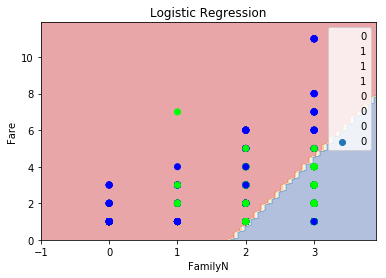

In [252]:
# import some data to play with
nd = train_x_all.values
X = nd[:,[11,5]]  # we only take the first two features.
Y = train_y_all.values

logreg = LogisticRegressionCV(cv=10)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.1),
                     np.arange(y_min,y_max, 0.1))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=Y,  cmap = plt.cm.brg)
plt.title("Logistic Regression")
plt.xlabel("FamilyN")
plt.ylabel("Fare")
plt.legend(Y)
plt.show()

### 3.2 RandomForest

###### 3.2.1 Start from decision tree

In [234]:
DCT_start = time.time()

DCT = DecisionTreeClassifier(random_state=42)
DCT_Parameter = {'criterion':['entropy','gini'],'max_depth':np.arange(5,20,1)}
DCT_GV = GridSearchCV(DCT, DCT_Parameter, cv = 10).fit(X_train, y_train)
DCT_Best_F1 = DCT_GV.best_score_
DCT_Best_Param = DCT_GV.best_params_
DCT_Best_Model = DCT_GV.best_estimator_

DCT_end = time.time()

print('DCT--The Training F1 score of the best model is : {}'.format(DCT_Best_F1))
print('DCT--The Training best parameters of model are : {}'.format(DCT_Best_Param))
print('DCT--Get Training the best model')
print(DCT_end - DCT_start)


DCT--The Training F1 score of the best model is : 0.8188202247191011
DCT--The Training best parameters of model are : {'criterion': 'entropy', 'max_depth': 5}
DCT--Get Training the best model
1.711216926574707


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [235]:
DCT_predict_gt = DCT_Best_Model.predict(test_x_all)

print('The Accuracy of Model in Test data is {}'.format(accuracy_score(test_y_all, DCT_predict_gt)))

The Accuracy of Model in Test data is 0.784688995215311


In [17]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=18,random_state=0)
tree.fit(X_train, y_train)
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data,filled=True,rounded=True,feature_names=X_train.columns.values.tolist(),class_names = ['0', '1'],special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("./Tree.png")
print('Visible tree plot saved as png.')

Visible tree plot saved as pdf.


In [44]:
def Learning_Process(X, y):
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)


    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = RandomForestClassifier(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, valid_scores = learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'f1')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        valid_std = np.std(valid_scores, axis = 1)
        valid_mean = np.mean(valid_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, valid_mean, 'o-', color = 'g', label = 'Validation Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, valid_mean - valid_std, \
            valid_mean + valid_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('f1_score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Random Forest classifier Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()
    
def Model_Complexity(X, y):
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    #max_depth = np.arange(1,30)
    n_estimators = np.arange(1,30)

    # Calculate the training and testing scores
    train_scores, valid_scores = validation_curve(RandomForestClassifier(max_depth=14), X, y, \
        param_name = "n_estimators", param_range = n_estimators, cv = cv, scoring = 'f1')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Random Forest classifier Complexity Performance')
    plt.plot(n_estimators, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(n_estimators, valid_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(n_estimators, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(n_estimators, valid_mean - valid_std, \
        valid_mean + valid_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Number-OF-estimators')
    plt.ylabel('f1_score')
    plt.ylim([-0.05,1.05])
    plt.show()

In [27]:
RDFC_start = time.time()

RDFC = RandomForestClassifier(criterion = 'entropy',random_state=43)
RDFC_Parameter = {'n_estimators':np.arange(5,20,1),'max_depth':np.arange(5,20,1)}
RDFC_GV = GridSearchCV(RDFC, RDFC_Parameter, cv = 10).fit(X_train, y_train)
RDFC_Best_F1 = RDFC_GV.best_score_
RDFC_Best_Param = RDFC_GV.best_params_
RDFC_Best_Model = RDFC_GV.best_estimator_

RDFC_end = time.time()

print('RDFC--The Training F1 score of the best model is : {}'.format(RDFC_Best_F1))
print('RDFC--The Training best parameters of model are : {}'.format(RDFC_Best_Param))
print('RDFC--Get Training the best model')
print(RDFC_end - RDFC_start)

RDFC--The Training F1 score of the best model is : 0.8441011235955056
RDFC--The Training best parameters of model are : {'max_depth': 9, 'n_estimators': 12}
RDFC--Get Training the best model
47.45237708091736


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
RDFC_predict = RDFC_Best_Model.predict(X_valid)
RDFC_acc = accuracy_score(y_valid, RDFC_predict)
RDFC_F1_Score = f1_score(y_valid, RDFC_predict, average='macro')

print('The Accuracy of Model in Valid data is {}'.format(RDFC_acc))
print('The F1-Score of Model in Valid data is {}'.format(RDFC_F1_Score))

The Accuracy of Model in Valid data is 0.8435754189944135
The F1-Score of Model in Valid data is 0.8297554347826087


In [29]:
RF_predict_gt = RDFC_Best_Model.predict(test_x_all)


print('The Accuracy of Model in Test data is {}'.format(accuracy_score(test_y_all, RF_predict_gt)))
print('The F1 of Model in Test data is {}'.format(f1_score(test_y_all, RF_predict_gt,average='macro')))

The Accuracy of Model in Test data is 0.7655502392344498
The F1 of Model in Test data is 0.7459880447453928


In [55]:
fpr_RF, tpr_RF, thresholds_RF = roc_curve(test_y_all, RF_predict_gt)

In [148]:
print(RF_predict_gt.shape)
print(test_y_all.shape)

confusion_matrix(test_y_all,RF_predict_gt)

(418,)
(418,)


array([[210,  50],
       [ 52, 106]])

In [49]:
fi = (RDFC_Best_Model.feature_importances_).tolist()
cf = X_train.columns.values.tolist()

In [50]:
total = pd.DataFrame(fi,cf)

In [51]:
total.T

,Pclass,Age,Fare,FamilyN,Alone,Sex_label,Eb_label,CW_label,AgeR_label,FareR_label,Ticket_label
0,0.088169,0.150655,0.189328,0.068778,0.018533,0.199124,0.030913,0.122107,0.041749,0.048243,0.0424


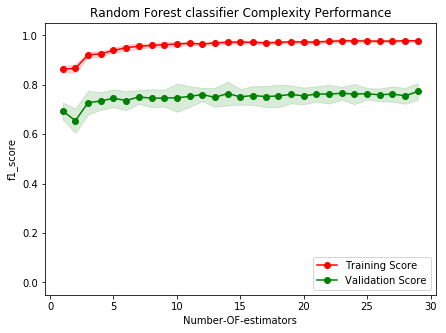

In [45]:
Model_Complexity(X_train, y_train)

Confusion matrix, without normalization
[[210  50]
 [ 52 106]]


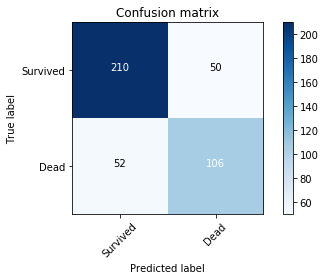

In [152]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
class_names = X_train.columns.values.tolist()
cnf_matrix = confusion_matrix(test_y_all, RF_predict_gt)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived','Dead'],
                      title='Confusion matrix')

plt.show()

###### 3.3 xgboost

In [40]:
XGB_start = time.time()

XGB = xgb.XGBClassifier(booster='gbtree',nthread=10,silent=1,objective='binary:logistic',
                        min_child_weight=0.03,learning_rate=0.0003,n_estimators=80,max_depth=5,gamma=0.0001).fit(X_train_xg, y_train_xg)

#XGB_Parameter = {'learning_rate':[0.01,0.03],'n_estimators':np.arange(10,200,10),
#                'max_depth':np.arange(0,10,1),'gamma':np.arange(0,8,0.01)}
#XGB_GV = GridSearchCV(XGB,XGB_Parameter).fit(X_train_xg, y_train_xg)
#XGB_Best_F1 = XGB_GV.best_score_
#XGB_Best_Param = XGB_GV.best_params_
#XGB_Best_Model = XGB_GV.best_estimator_

XGB_end = time.time()

#print('XGB--The Training F1 score of the best model is : {}'.format(XGB_Best_F1))
#print('XGB--The Training best parameters of model are : {}'.format(XGB_Best_Param))
print('XGB--Get Training the best model')
print(XGB_end - XGB_start)

XGB--Get Training the best model
0.11943507194519043


In [41]:
XGB_predict = XGB.predict(X_valid_xg)
XGB_acc = accuracy_score(y_valid_xg, XGB_predict)
XGB_F1_Score = f1_score(y_valid_xg, XGB_predict, average='macro')

print('The Accuracy of Model in Test data is {}'.format(XGB_acc))
print('The F1-Score of Model in Test data is {}'.format(XGB_F1_Score))

The Accuracy of Model in Test data is 0.8379888268156425
The F1-Score of Model in Test data is 0.8142422615852567


In [42]:
XGB_predict_gt = XGB.predict(np.array(test_x_all))

print('The Accuracy of Model in Test data is {}'.format(accuracy_score(np.array(test_y_all), XGB_predict_gt)))

The Accuracy of Model in Test data is 0.7990430622009569


In [56]:
fpr_XG, tpr_XG, thresholds_XG = roc_curve(test_y_all, XGB_predict_gt)

###### 3.4 SVM

In [45]:
SVM_start = time.time()

SVM = SVC(gamma=0.001,probability=True)
SVM_Parameter = {'C':np.arange(5,35,1)}
SVM_GV = GridSearchCV(SVM, SVM_Parameter, cv = 10).fit(X_train, y_train)
SVM_Best_F1 = SVM_GV.best_score_
SVM_Best_Param = SVM_GV.best_params_
SVM_Best_Model = SVM_GV.best_estimator_

SVM_end = time.time()

print('SVM--The Training F1 score of the best model is : {}'.format(SVM_Best_F1))
print('SVM--The Training best parameters of model are : {}'.format(SVM_Best_Param))
print('SVM--Get Training the best model')
print(SVM_end - SVM_start)


DCT--The Training F1 score of the best model is : 0.7668539325842697
DCT--The Training best parameters of model are : {'C': 30}
DCT--Get Training the best model
27.667280912399292


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [46]:
SVM_predict_gt = SVM_Best_Model.predict(test_x_all)

print('The Accuracy of Model in Test data is {}'.format(accuracy_score(test_y_all, SVM_predict_gt)))

The Accuracy of Model in Test data is 0.7081339712918661


In [57]:
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(test_y_all, SVM_predict_gt)

- Voting

In [47]:
VOTE_start = time.time()

VOTE = VotingClassifier(estimators=[('rfc', RDFC_Best_Model),('svc',SVM_Best_Model),('LR', LR),('xgboost',XGB)], voting='soft', n_jobs=8)
VOTE = VOTE.fit(X_train, y_train)

VOTE_end = time.time()

print(VOTE_end - VOTE_start)

VOTE_predict = VOTE.predict(X_valid)
VOTE_acc = accuracy_score(y_valid, VOTE_predict)
#VOTE_F1_Score = f1_score(y_valid, VOTE_acc, average='macro')

print('The Accuracy of Model in Test data is {}'.format(VOTE_acc))
#print('The F1-Score of Model in Test data is {}'.format(VOTE_F1_Score))

5.929737091064453
The Accuracy of Model in Test data is 0.8156424581005587


In [48]:
VOTE_predict_gt = VOTE.predict(test_x_all)

print('The Accuracy of Model in Test data is {}'.format(accuracy_score(test_y_all, VOTE_predict_gt)))

The Accuracy of Model in Test data is 0.7559808612440191


In [58]:
fpr_VOTE, tpr_VOTE, thresholds_VOTE = roc_curve(test_y_all, VOTE_predict_gt)

In [62]:
print(auc(fpr_VOTE, tpr_VOTE))
print(auc(fpr_SVM, tpr_SVM))
print(auc(fpr_RF, tpr_RF))
print(auc(fpr_LR, tpr_LR))
print(auc(fpr_XG, tpr_XG))

0.7479795520934762
0.7020691333982474
0.7420155793573515
0.7467380720545278
0.7627312560856865


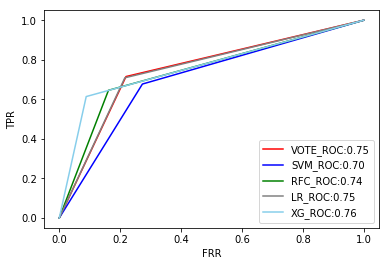

In [64]:
plt.plot(fpr_VOTE, tpr_VOTE, color='red', label='VOTE_ROC:0.75')
plt.plot(fpr_SVM, tpr_SVM, color='blue', label='SVM_ROC:0.70')
plt.plot(fpr_RF, tpr_RF, color='green', label='RFC_ROC:0.74')
plt.plot(fpr_LR, tpr_LR, color='grey', label='LR_ROC:0.75')
plt.plot(fpr_XG, tpr_XG, color='skyblue', label='XG_ROC:0.76')
plt.legend()

plt.xlabel('FRR')
plt.ylabel('TPR')
plt.show()

- JustForest

In [9]:
def easy_accuracy(truth, pred):
    
    if len(truth) == len(pred):
        
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        
        return "Number of predictions does not match number of outcomes!"

In [15]:
#the proportion of people: survived or not survived
Not_Survived = []
Survived = []

for _, passenger in raw_x_all.iterrows():
    Not_Survived.append(0)
    Survived.append(1)

Not_Survived = pd.Series(Not_Survived)
Survived = pd.Series(Survived)
print (easy_accuracy(raw_y_all, Not_Survived))
print (easy_accuracy(raw_y_all, Survived))

Predictions have an accuracy of 61.62%.
Predictions have an accuracy of 38.38%.


In [26]:
def predictions_4(data):
    
    # Yet another solution, using features "Embarked" (which seemingly unrelavant...)
    pred = []
    for _, p in data.iterrows():

        if p["Sex"] == "female":
            if p["Pclass"] == 1 or p["Pclass"] == 2:
                pred.append(1)
            else:
                if p["Embarked"] == "C" or p["Embarked"] == "Q":
                    pred.append(1)
                else:
                    pred.append(0)        
        else:
            if p['Age'] <= 10:
                if p['Pclass'] < 3:
                    pred.append(1)
                else:
                    if p['SibSp'] < 2:
                        pred.append(1)
                    else:
                        pred.append(0)
            else:
                pred.append(0)
                
    # Return our predictions
    return pd.Series(pred)

# Make the predictions
pred = predictions_4(raw_x_all)
print (accuracy_score(raw_y_all, pred))

Predictions have an accuracy of 83.16%.


In [ ]:
#data_cor = train_raw_data_all.corr()
#data_cor.style.background_gradient()
#data_cor = train_raw_data_all.corr()
#data_cor.style.background_gradient()
#sns.pairplot(train_raw_data_all,hue = 'Survived')
#tpl = sns.countplot(x="Ticket",data=train_raw_data_all)
#tpl = plt.setp(tpl.get_xticklabels(), rotation=90)
#train_raw_data_all = pd.get_dummies(train_raw_data_all, columns = ["Ticket"], prefix="T")
#test_raw_data_all = pd.get_dummies(test_raw_data_all, columns = ["Ticket"], prefix="T")

#print(train_raw_data_all.shape)
#print(test_raw_data_all.shape)
#cwpl = sns.countplot(x="CallWhat",data=train_raw_data_all,palette="Blues_d")
#cwpl = plt.setp(cwpl.get_xticklabels(), rotation=45)
#cwpl = sns.countplot(x="CallWhat",data=train_raw_data_all,palette="Blues_d")
#cwpl = plt.setp(cwpl.get_xticklabels(), rotation=0)
#data_cor = train_raw_data_all.corr()
#data_cor.style.background_gradient()
#sns.pairplot(train_raw_data_all,hue = 'Survived')
#train_raw_data_all.head()
#fig, saxis = plt.subplots(2, 3,figsize=(16,12))

#sns.barplot(x = 'Embarked', y = 'Survived', data=train_raw_data_all, ax = saxis[0,0],palette="Blues_d")
#sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train_raw_data_all, ax = saxis[0,1],palette="Blues_d")
#sns.barplot(x = 'Alone', y = 'Survived', order=[1,0], data=train_raw_data_all, ax = saxis[0,2],palette="Blues_d")

#sns.pointplot(x = 'FareR', y = 'Survived',  data=train_raw_data_all, ax = saxis[1,0])
#sns.pointplot(x = 'AgeR', y = 'Survived',  data=train_raw_data_all, ax = saxis[1,1])
#sns.pointplot(x = 'FamilyN', y = 'Survived', data=train_raw_data_all, ax = saxis[1,2])